# MACHINE LEARNING LAB
<hr>

## Topic: Bank Customer Churn Prediction
## Dataset:
#### https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

## Team:
<ol>
  <li>Srushti Dhakate (25)</li>
  <li>Prathamesh Gujar (52)</li>
  <li>Prathamesh Rajbhoj (53)</li>
</ol>

### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

###  Display Top 5 Rows of The Dataset

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check Last 5 Rows of The Dataset

In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Data Info

In [ ]:
data.shape

(10000, 14)

In [ ]:
print("Number of Instances", data.shape[0])
print("Number of Attributes", data.shape[1])

Number of Instances 10000
Number of Attributes 14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Statistics About The Dataset

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dropping Columns

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 8. Encoding Categorical Data

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Imbalanced Dataset

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Seperating Input & Result attributes

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

### Handling Imbalanced Data With SMOTE

In [ ]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Splitting The Dataset Into The Training Set And Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

### Feature Scaling

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.37508488,  0.20196904, -1.03267869, ..., -0.58037148,
        -0.46213038, -0.84483587],
       [ 1.094886  ,  0.10135176, -1.4005952 , ..., -0.58037148,
        -0.46213038,  1.18366186],
       [-0.50574895,  1.20814177, -1.76851171, ..., -0.58037148,
        -0.46213038, -0.84483587],
       ...,
       [ 0.2020148 ,  0.20196904,  1.17482038, ..., -0.58037148,
        -0.46213038,  1.18366186],
       [-2.17171594,  1.30875904, -0.66476218, ..., -0.58037148,
        -0.46213038, -0.84483587],
       [ 0.528675  ,  1.00690722, -1.4005952 , ...,  1.72303434,
        -0.46213038,  1.18366186]])

In [ ]:
# Model Analysis Formulas

# precision = TP / (FP + TP)
# recall = TP / (TP + FN)
# f1score = (2 * precision * recall) / (precision + recall)

### KNeighbors Classifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.822661644695543

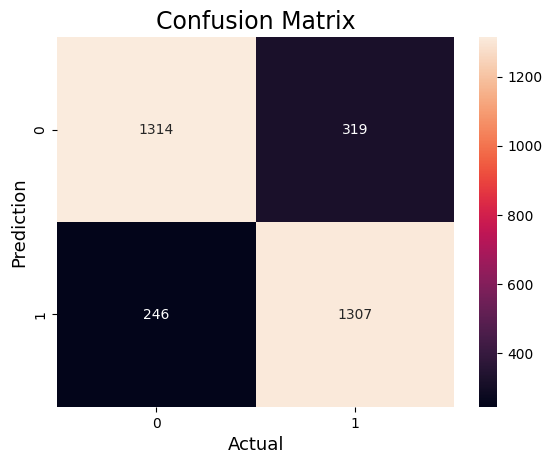





              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1633
           1       0.80      0.84      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



In [ ]:
cm3 = confusion_matrix(y_test,y_pred3)
# print('Confusion matrix\n\n', cm)

sns.heatmap(cm3,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])


plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

print("\n\n\n")

print(classification_report(y_test,y_pred3))

### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
root_node = dt.tree_
# Print information about the root node
print("Feature index for the root node:", root_node.feature[0])
print("Threshold value for the root node:", root_node.threshold[0])

Feature index for the root node: 1
Threshold value for the root node: -0.15019141882658005


In [ ]:
cols = data.drop('Exited',axis=1).columns
feature_names = np.array(cols)

In [ ]:
# Access the root node's feature index
root_feature_index = dt.tree_.feature[0]

# Get the feature name for the root node
root_feature_name = feature_names[root_feature_index]

# Print the feature name of the root node
print("Feature name for the root node:", root_feature_name)

Feature name for the root node: Age


In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8057124921531701

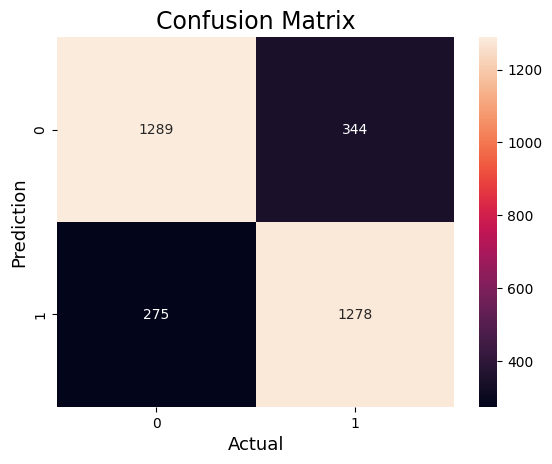





              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1633
           1       0.79      0.82      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



In [ ]:
cm4 = confusion_matrix(y_test,y_pred4)
# print('Confusion matrix\n\n', cm)

sns.heatmap(cm4,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])


plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

print("\n\n\n")

print(classification_report(y_test,y_pred4))

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8691148775894538

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier()

# # Define the hyperparameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create the grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)


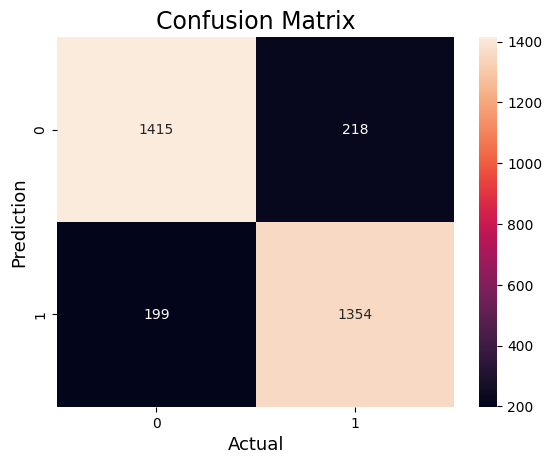





              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1633
           1       0.86      0.87      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [ ]:
cm5 = confusion_matrix(y_test,y_pred5)
# print('Confusion matrix\n\n', cm)

sns.heatmap(cm5,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])


plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

print("\n\n\n")

print(classification_report(y_test,y_pred5))

### Model Comparision

In [ ]:
final_data=pd.DataFrame({'Models':['KNN','DT','RF'],
                        'ACC':[accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5)]})

In [ ]:
final_data

,Models,ACC
0,KNN,0.822662
1,DT,0.805712
2,RF,0.869115


<Axes: xlabel='Models', ylabel='ACC'>

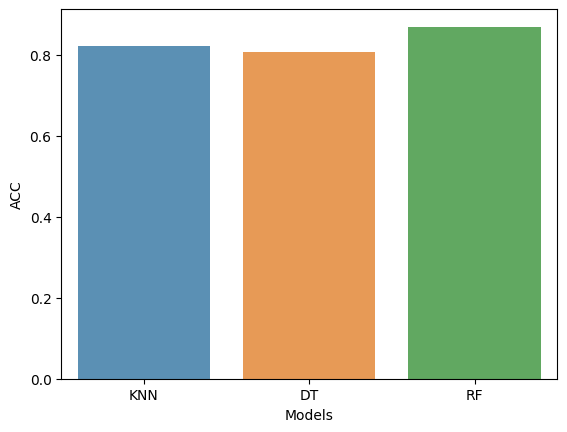

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'], alpha=0.8)

In [ ]:
final_data=pd.DataFrame({'Models':['KNN','DT','RF'],
                        'PRE':[precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5)]})

In [ ]:
final_data

,Models,PRE
0,KNN,0.803813
1,DT,0.787916
2,RF,0.861323


<Axes: xlabel='Models', ylabel='PRE'>

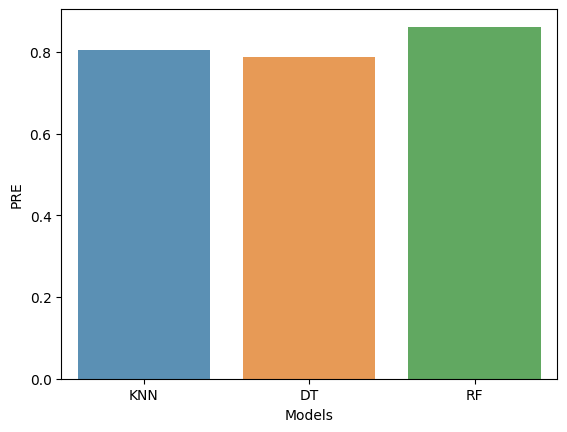

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['PRE'], alpha=0.8)

### 18. Save The Model

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
data.drop('Exited',axis=1).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
prediction = model.predict([
    [
        619,
        42,
        2,
        1000.0,
        0,
        0,
        0,
        101348.88,
        0,
        0,
        0]
  ])



# prediction = model.predict([
#     [
#         619,
#         50,
#         1,
#         150000.0,
#         0,
#         0,
#         0,
#         101348.88,
#         0,
#         0,
#         1]
#   ])

prediction

array([1])

In [ ]:
output = ["Customer will leave", "Customer will continue"]

print(output[prediction[0]])

Customer will continue
